In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Reshape
import os
import tensorflow as tf
import Dataloader
import ImageResize
from keras.preprocessing import image
import models as models
import importlib
importlib.reload(models)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels), my_dict = Dataloader.load_data()

train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)
num_classes = 46

In [10]:
model = models.badass_network()
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 32, 32, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 4)    104         reshape_1[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 14, 14, 4)    0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [11]:
model = models.convolutional_neural_network()
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                100384    
__________

In [13]:
model.fit(train_images, train_labels,
        epochs=5,
        verbose=1,
        shuffle=True,
        validation_data=(test_images, test_labels))

Train on 78200 samples, validate on 13800 samples
Epoch 1/5
78200/78200 [==============================] - 61s 777us/step - loss: 0.8773 - acc: 0.7533 - val_loss: 0.3422 - val_acc: 0.9012
Epoch 2/5
78200/78200 [==============================] - 63s 805us/step - loss: 0.3419 - acc: 0.8991 - val_loss: 0.2366 - val_acc: 0.9312
Epoch 3/5
78200/78200 [==============================] - 55s 705us/step - loss: 0.2539 - acc: 0.9245 - val_loss: 0.2094 - val_acc: 0.9365
Epoch 4/5
78200/78200 [==============================] - 64s 812us/step - loss: 0.2108 - acc: 0.9370 - val_loss: 0.1766 - val_acc: 0.9478
Epoch 5/5
78200/78200 [==============================] - 68s 871us/step - loss: 0.1795 - acc: 0.9468 - val_loss: 0.1634 - val_acc: 0.9521


In [14]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

13800/13800 [==============================] - 3s 215us/step
Test loss: 0.1634364715638314
Test accuracy: 0.9521014492753623


In [15]:
model.save('resnet_handwriting.h5')

(1, 32, 32)


TypeError: Invalid dimensions for image data

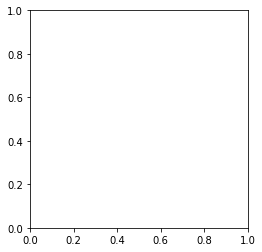

In [3]:
test_img = ImageResize.resizeImage('TestImage/ka.png')
print(test_img.shape)
plt.imshow(test_img)

In [4]:
model = keras.models.load_model('resnet_handwriting.h5', compile=False)
predictions = model.predict(test_img)
predicted_class = np.argmax(predictions[0])
print(my_dict.get(predicted_class))

क


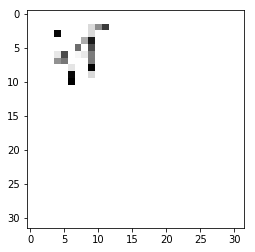

In [11]:
from PIL import Image, ImageFilter,ImageOps
test_image = image.load_img('TestImage/kha2.png', target_size = (32,32), color_mode="grayscale")
test_image = ImageOps.invert(test_image)
test_image = tf.keras.utils.normalize(test_image, axis=1)
test_image = image.img_to_array(test_image)
test_image = test_image.reshape((test_image.shape[0], -1), order='F')
plt.imshow(test_image, cmap='Greys')
test_image = np.expand_dims(test_image, axis = 0)